# Lab Report 2

**Research question 1**: Can we observe a masked priming effect (in a non-native language)?

**Research question 2**: If there is a masked priming effect, does it increase, decrease, or stay the same after a short period of time (80 ms)?

**Research question 3**: If there is a masked priming effect, is there also a semantic priming effect (in the incongruent pairs)?

Other things to check:

- did participants improve over time (both within blocks and over all trials)?
- did it make a difference whether participants were in block A or block B (short SOA then long vs. long SOA then short)?
- ???

Two main communications: short and long Stimulus Onset Asynchrony (SOA)

- Fixation: ###### 539 ms
- Mask: ##### 32 ms
- Prime: 32 ms
- Mask: ##### 32 ms
- (short SOA condition): 0 ms break. Proceed directly to target
- (long condition): Blank screen: 80 ms
- Target: timeout after 2000 ms

30 prime/target pairs in the short condition and 30 pairs in the long condition

Approx. half the participants saw the short SOA first (group A), and half saw the long SOA first (group B).

Congruent and Incongruent stimuli were fully randomised within each SOA block

Stimuli were taken from: 

Peel, H. J., Royals, K. A., & Chouinard, P. A. (2022). The effects of word identity, case, and SOA on word priming in a subliminal context. _Journal of Psycholinguistic Research, 51_(1), 1-15.


In [14]:
# setup

import pandas as pd
import pingouin as pg
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Combine the data from group A and group B

In [15]:
raw_a = pd.read_csv("MR_A.csv")
raw_b = pd.read_csv("MR_B.csv")

df_A = pd.DataFrame({"id": raw_a['jatosStudyResultId'],
                     "counter_balance": raw_a['counterbalance'],
                     "condition": raw_a['condition'],
                     "rt": raw_a['response_time'],
                     "congruence": raw_a['congruence'],
                     "soa": raw_a['soa_condition']})
df_A = df_A.loc[df_A['soa'] != 'practice']
df_A.head()


df_B = pd.DataFrame({"id": raw_b['jatosStudyResultId'],
                     "counter_balance": raw_b['counterbalance'],
                     "condition": raw_b['condition'],
                     "rt": raw_b['response_time'],
                     "congruence": raw_b['congruence'],
                     "soa": raw_b['soa_condition']})
df_B = df_B.loc[df_B['soa'] != 'practice']
df_B.head()

df = pd.concat([df_A,df_B])

Plot the data

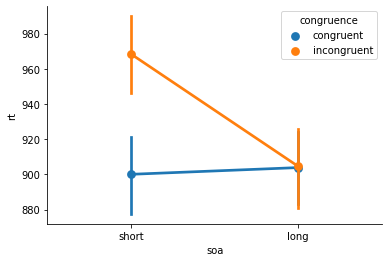

In [16]:
sns.pointplot(data = df, x = 'soa', y = 'rt', hue = 'congruence')
sns.despine()

In [12]:
list(df)

['id', 'counter_balance', 'condition', 'rt', 'congruence', 'soa']

In [13]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(df)

In [14]:
len(df['id'].unique())

23

In [15]:
aov = pg.rm_anova(dv = 'rt', within =['congruence', 'soa'],
                  subject= 'id', data = df)
aov

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,congruence,27378.050048,1,22,27378.050048,15.337799,0.000739,0.000739,0.014364,1.0
1,soa,20738.017440,1,22,20738.017440,5.084641,0.034427,0.034427,0.010918,1.0
2,congruence * soa,26361.816425,1,22,26361.816425,12.020311,0.002191,0.002191,0.013838,1.0


In [10]:
df.to_csv('Masked_repetition_priming_data-2022', index = False)

In [9]:
list(df)

['id', 'counter_balance', 'condition', 'rt', 'congruence', 'soa']